In [24]:
from matplotlib import pyplot as plt
import networkx as nx
import pandas as pd
import json

In [111]:
with open('./EdMot/output/cora_membership.json','r') as f:
    cluster_re = json.load(f)

with open('./num_to_name.json',  'r') as f:
    num_to_name = json.load(f)

with open('./name_to_num.json',  'r') as f:
    name_to_num = json.load(f)

In [114]:
graph_csv=pd.read_csv('./EdMot/input/cora_edges.csv').values.tolist()

In [115]:
for i in range(len(graph_csv)):
    for j in range(len(graph_csv[0])):
        graph_csv[i][j] = num_to_name[str(graph_csv[i][j])]

In [116]:
G = nx.from_edgelist(graph_csv)

In [117]:
V = [node for node in G.nodes()]

In [118]:
k_cl=max(list(cluster_re.values()))
k_cl

25

In [141]:
com = [
    [num_to_name[i] for i in cluster_re.keys() if cluster_re[i]==j] for j in range(k_cl+1)  
       ] 
new_com =[i for i in com if len(i)>10]

In [143]:
G_graph = nx.Graph()
for each in new_com:
    G_graph.update(nx.subgraph(G, each))
color = []
for i in new_com:
    for j in i:
        num = str(name_to_num[j])
        color.append(cluster_re[num])

In [154]:
from matplotlib.pyplot import figure, text

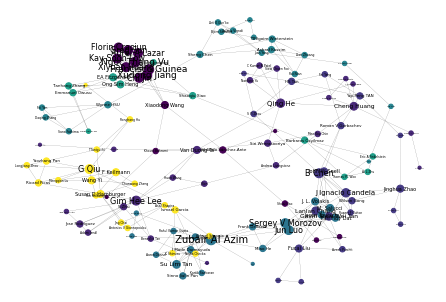

In [167]:
d = dict(G_graph.degree)
pos = nx.spring_layout(G_graph, k=0.33)
#nx.draw(G, pos, with_labels=False, node_size=2, width=0.1, alpha=0.2)
nx.draw(G_graph, pos, node_color=color, node_size=[i[1]*10 for i in G_graph.degree()], width=0.1)
for node, (x, y) in pos.items():
    text(x, y, node, fontsize=d[node], ha='center', va='center')
    
plt.savefig('./test2.jpg',dpi = 400)
plt.show()